## I have a desire to make some cool actile about big five, using some DS/statistics metods to confirm my assumptions. This is a sandbox file, where I'll spiele(play) with data.

### Wikipedia article about personality test - https://en.wikipedia.org/wiki/Big_Five_personality_traits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
path = r'C:\Users\Gev\Desktop\Data science\Big Five\data-final.csv'

In [4]:
%%time
frame = pd.read_csv(path, header = 0, nrows = 500000, sep = '\t', low_memory = False)

Wall time: 10.9 s


In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 419.6+ MB


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
frame.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


#### Firstly I'll cut only Extroversion questions and try to analyse only them. And I'll change the scoring system from (0;5) to (-2; 2). Thanks this guy(https://www.kaggle.com/tunguz/big-five-personality-test/discussion/132061) for the tip. 

In [8]:
df_ext = frame.iloc[:, :10].copy()

In [9]:
pos_questions = ['EXT1','EXT3','EXT5','EXT7','EXT9']
neg_questions = ['EXT2','EXT4','EXT6','EXT8','EXT10']

In [10]:
df_ext[pos_questions] = df_ext[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})

In [11]:
df_ext[neg_questions] = df_ext[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

In [12]:
df_ext['EXT_score'] = df_ext.iloc[:,:10].apply('mean', axis = 1)

In [13]:
df_ext.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EXT_score
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.6
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,-0.5
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,-0.4
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-0.1


In [14]:
frame.iloc[:1,:]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991


In [15]:
# How to make 10 scale

In [16]:
# [-2 - 2] to [1 - 10]

In [17]:
# 10 = a + b(2) As I want 2 to be 10
# 1 = a + b(-2) -2 to be 1
# I think that the relation should be linear

In [18]:
df_ext['EXT_score_10_scale'] = df_ext['EXT_score'].apply(lambda x: (x * 2.25) + 5.5)

In [19]:
df_ext.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EXT_score,EXT_score_10_scale
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.6,9.100
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,3.250
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,-0.5,4.375
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,-0.4,4.600
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-0.1,5.275


### To check if everything is the way I wanted, I'll use histograms

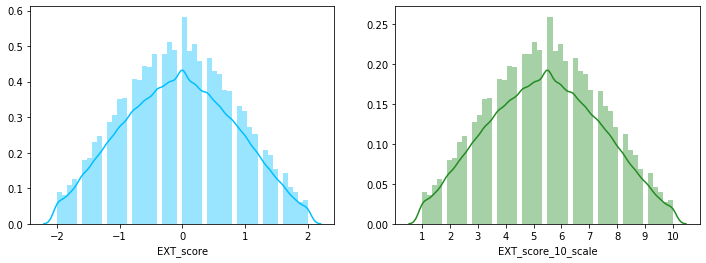

In [20]:
fig, axis = plt.subplots(1,2, figsize = (12,4))
axis = axis.ravel()

axis[0] = sns.distplot(df_ext['EXT_score'], color = 'deepskyblue', ax = axis[0])
axis[1] = sns.distplot(df_ext['EXT_score_10_scale'], color = 'forestgreen', ax = axis[1])
axis[1].set_xticks(list(range(1,11,1)))
plt.show()

In [21]:
# As KDE`s are almost(or exaclty) similar, I assume that we don`t lose any information

In [22]:
org_df = frame.iloc[:, :10].copy() # Initial data frame, with 

In [23]:
org_df['EXT_score_10_scale'] = df_ext['EXT_score_10_scale']

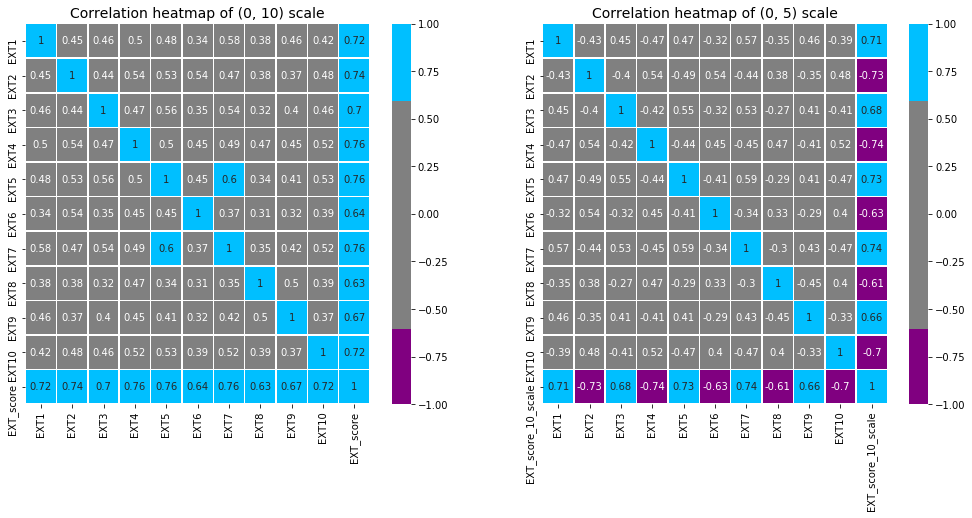

In [24]:
fig, axis = plt.subplots(1,2, figsize = (17,7))
axis = axis.ravel()

org_corr = org_df.corr()
corr = df_ext.iloc[:, :-1].corr()
cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue']

# Corr heatmap of (0, 10) scale
axis[0] = sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap, ax = axis[0])
axis[0].set_title('Correlation heatmap of (0, 10) scale', fontsize = 14)

# Corr heatmap of (0.5) scale and with negative questions. P.S. some questions effect negativly on answer
axis[1] = sns.heatmap(org_corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap, ax = axis[1])
axis[1].set_title('Correlation heatmap of (0, 5) scale', fontsize = 14)

#plt.savefig(r'C:\Users\Gev\Desktop\Data science\Big Five\fig.jpg')
plt.show()

#### To be honest, this color maps are completely unnecessary, cus it is obvious that there are linear relationship between questions and score(Scores are calculated by me). But one the other hand they look beautiful :D

In [25]:
# Black page

#### Now I need to calcluate score for all five traits and bulid five factor model for each observation(person)

In [26]:
df = frame.iloc[:, :50] # Extracting all questions only

In [27]:
df.head(1)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0


In [28]:
# positive questions adding to the trait.
pos_questions = [ 
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7
]

# negative (negating) questions subtracting from the trait.
neg_questions = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5
    'EST2','EST4',                       # 2
    'AGR1','AGR3','AGR5','AGR7',         # 4
    'CSN2','CSN4','CSN6','CSN8',         # 4
    'OPN2','OPN4','OPN6',                # 3
]

df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

In [29]:
df.head(1)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0


In [30]:
extraversion = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
neuroticism = ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
agreeableness = ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']
conscientiousness  = ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
openness = ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

In [31]:
five_traits = {'extraversion': extraversion, 
               'neuroticism': neuroticism, 
               'agreeableness': agreeableness, 
               'conscientiousness' : conscientiousness,
               'openness': openness
              }

In [32]:
for trait in five_traits:
    df[trait] = df.loc[:, five_traits[trait]].apply('mean', axis = 1)

In [33]:
df.head(1)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,1.6,-0.6,0.9,0.2,1.5


In [34]:
for trait in five_traits:
    df[trait] = df[trait].apply(lambda x: (x * 2.25) + 5.5)
    df[trait] = df[trait].round(1)

In [35]:
df.head(1)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,9.1,4.2,7.5,6.0,8.9


In [36]:
antworten = df.iloc[:, -5:].copy() # Extracting answers /P.S Antworten = 'answers' in German

In [37]:
antworten.head(1)

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,9.1,4.2,7.5,6.0,8.9


In [38]:
# Lets build mean personality

In [39]:
mean_personality = antworten.apply('mean', axis = 0)

In [40]:
mean_personality = mean_personality.to_frame()
mean_personality = mean_personality.reset_index()
mean_personality.rename(columns = {'index': 'trait', 0: 'score'}, inplace = True)
mean_personality['score'] = mean_personality['score'].round(2)
mean_personality.head()

,trait,score
0,extraversion,5.40
1,neuroticism,5.65
2,agreeableness,7.19
3,conscientiousness,6.27
4,openness,7.40


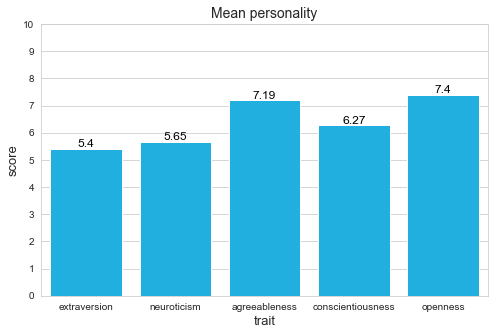

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,5))

barplot = sns.barplot(x = 'trait', y = 'score', data = mean_personality, color = 'deepskyblue')

plt.ylim((0,10))
plt.yticks(list(range(0,11,1)))
plt.xlabel('trait', fontsize = 13)
plt.ylabel('score', fontsize = 13)
plt.title('Mean personality', fontsize = 14)
plt.xticks(rotation = 0)

inter = iter(range(5)) 
for index, row in mean_personality.iterrows():
    barplot.text(y = row.score, x = next(inter), s = str(row.score), color='black', ha="center", va = 'bottom', fontsize = 12)



plt.show()

In [42]:
mean_personality.describe()

,score
count,5.00000
mean,6.38200
std,0.89469
min,5.40000
25%,5.65000
50%,6.27000
75%,7.19000
max,7.40000


#### Mean Personality
As we can see from here, 'mean' personality does not consist of only 5 values (or something around that).  The mean is 6.38 with standard error of 0.89.

I think this is because of our society. In our society, it is quite normal to be introverted nowadays. Everyone has depression in their lives, so talking about neuroticism is another common thing. What about conscientiousness? As Dr. Peterson said, there is no model for describing conscientiousness, so I think that the questions here are a bit tricky and most people just answering some average answers. 

The most interesting are the last 2: agreeableness and openness.

Here is the thing. In our society it is considered 'bad' to be low in agreeableness, to be competitive. Nobody accepts, that you are not 'suxafrukt' it is just your personality. I am not saying that if you are bad at understanding others emotions (As me) you should never work on yourself to be better, but we should talk about that with more empathy, as a trait not something wrong. And this is the reason why people 'afraid' of their real answers.

The same thing with openness. Accepting that you are 'not creative' and 'not full of new ideas' is not the most pleasant thing.

#### Update
Thinking about the armenain sample(see later in this notebokk), I find out that in this data, maybe, there are only people who decided to pass the test at their own will. So from here we can conclude, that these are people with high openness as this test interested them. This can be openness high mean score's reason. And cconscientiousness high mean score's too. <br>
But I cann't figure out the reason of agreeableness high mean score yet.

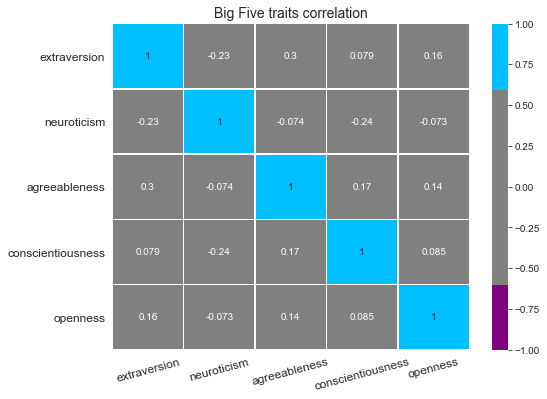

In [43]:
plt.figure(figsize = (8,6))
sns.heatmap(antworten.corr(), linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)
plt.xticks(fontsize = 12, rotation = 15)
plt.yticks(fontsize = 12)
plt.title('Big Five traits correlation', fontsize = 14)
# plt.savefig(r'C:\Users\Gev\Desktop\Data science\Big Five\fig.png')
plt.show()

### Important notes
##### • There is some positive relation between agreeableness and extraversion. This is my old assumption, which I tested today. Interesting feelings.
##### • The relation between conscientiousness and neuroticism is negative, as I thought. 
##### • There is no significant relationships between neuroticism and openness, which is a bit strange, cus I thought, that high openness will causes low neuroticism. As we see it is not so.
##### • The correlation between extraversion and neuroticism is not so significant, but it is negative and can give answers to some questions.

In [44]:
# Blank page

### Distribution of all traits

In [45]:
five_traits.keys()

dict_keys(['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness'])

In [46]:
antworten.head()

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,9.1,4.2,7.5,6.0,8.9
1,3.2,4.4,8.6,7.1,6.6
2,4.4,4.6,8.2,6.4,8.0
3,4.6,5.3,7.3,4.4,7.5
4,5.3,3.0,9.1,9.6,9.6


extraversion
Mean value of extraversion is 5.4


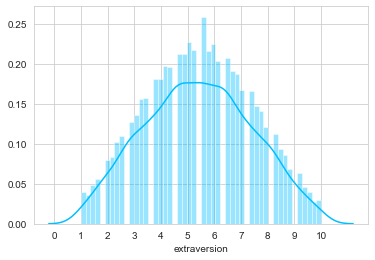

____________________________________________________________________________________________________
neuroticism
Mean value of neuroticism is 5.65


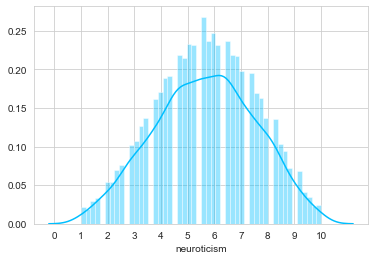

____________________________________________________________________________________________________
agreeableness
Mean value of agreeableness is 7.19


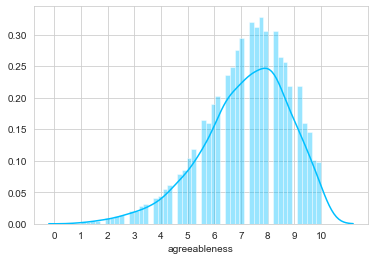

____________________________________________________________________________________________________
conscientiousness
Mean value of conscientiousness is 6.27


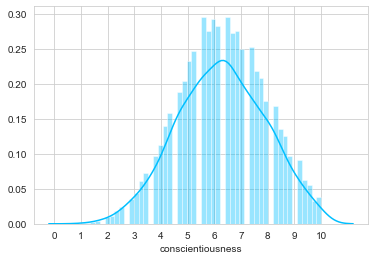

____________________________________________________________________________________________________
openness
Mean value of openness is 7.4


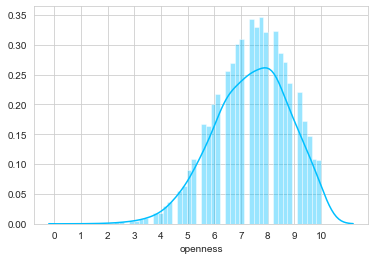

____________________________________________________________________________________________________


In [47]:
for col in antworten.columns:
    print(col)
    sns.distplot(antworten[col], color = 'deepskyblue', kde_kws = {'bw' : .4})
    plt.xticks(list(range(11)))
    print('Mean value of {} is {}'.format(col, round(df[col].mean(), 2)))
    plt.show()
    print('_' * 100)

### Lets try to find some insights from my own country

In [48]:
arm = frame.loc[frame.country == 'AM']

In [49]:
arm.index

Int64Index([ 27350,  28346,  42554,  44178,  50560,  70555,  74204,  81476,
             94704, 140619, 158635, 161509, 163854, 168567, 182591, 197782,
            197958, 212775, 240155, 241114, 253298, 258120, 274701, 297877,
            309069, 320259, 336484, 340962, 344193, 376972, 391967, 419606,
            420755, 423937, 423942, 423945, 463659, 464915, 465506, 467194,
            468577, 489970, 493067],
           dtype='int64')

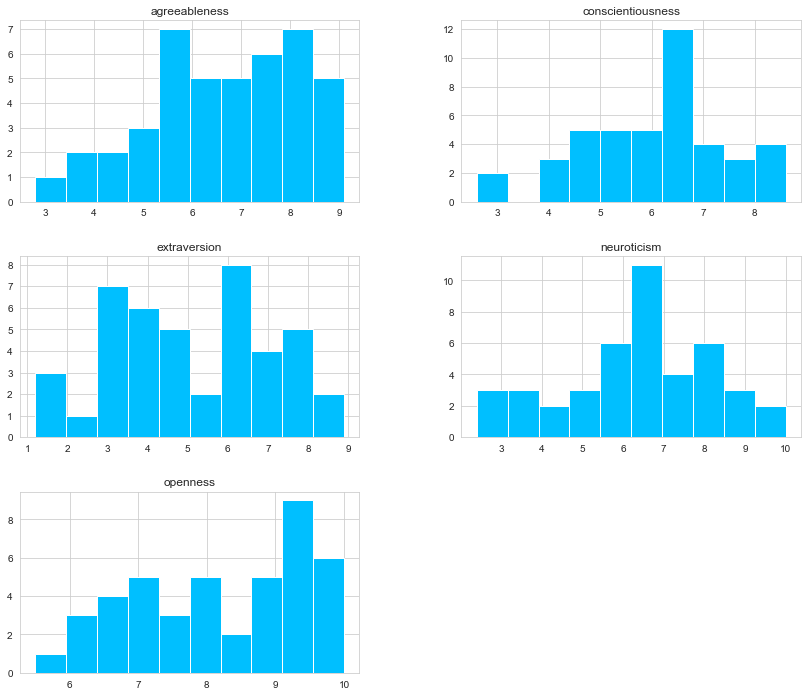

In [50]:
arm = antworten.loc[arm.index]
arm.hist(color = 'deepskyblue', figsize = (14, 12), bins = 10)
plt.xticks(list(range(1,11)))
plt.show()

In [51]:
arm.shape

(43, 5)

In [52]:
pd.DataFrame(arm.mean(), columns = ['Mean score'])

,Mean score
extraversion,5.074419
neuroticism,6.341860
agreeableness,6.644186
conscientiousness,6.016279
openness,8.132558


### An interesting thought!
#### Initially, I didn't understand why there is high mean score of 'openness'  among armenians, as I thought, that the biggest problem of our society is high conservatism. But then I realised, that these 43 people are from high openness part of the openness distribution of all nation. And beause of their high openness they decided to pass this test.

In [53]:
# Blank page

### Relationship between testelapse and personality 

In [54]:
# testelapse  - The time in seconds spent on the page with the survey questions

In [55]:
frame['testelapse'].describe().to_frame()

,testelapse
count,4.982170e+05
mean,6.349903e+02
std,1.265793e+04
min,1.000000e+00
25%,1.740000e+02
50%,2.270000e+02
75%,3.180000e+02
max,4.987930e+06


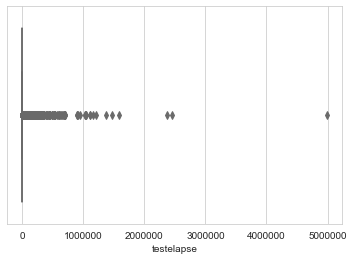

In [56]:
sns.boxplot(frame['testelapse'], palette = 'Set3')
plt.show()

In [57]:
tdf = antworten.join(frame[['testelapse', 'IPC']])

In [58]:
tdf.head()

,extraversion,neuroticism,agreeableness,conscientiousness,openness,testelapse,IPC
0,9.1,4.2,7.5,6.0,8.9,234.0,1
1,3.2,4.4,8.6,7.1,6.6,179.0,1
2,4.4,4.6,8.2,6.4,8.0,186.0,1
3,4.6,5.3,7.3,4.4,7.5,219.0,1
4,5.3,3.0,9.1,9.6,9.6,315.0,2


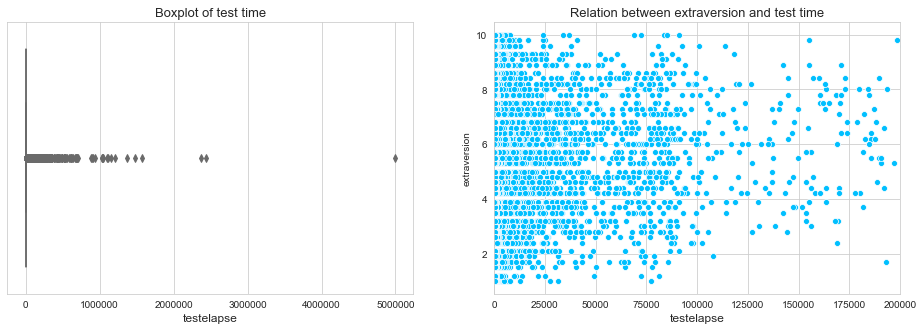

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1 = sns.boxplot(tdf['testelapse'], palette = 'Set3', ax = ax1)
ax1.set_title('Boxplot of test time', fontsize = 13)
ax1.set_xlabel(xlabel = 'testelapse', fontsize = 12)

ax2 = sns.scatterplot(y = 'extraversion', x = 'testelapse', data = tdf, color = 'deepskyblue', ax = ax2)
ax2.set_xlim((0,200000))
ax2.set_title('Relation between extraversion and test time', fontsize = 13)
ax2.set_xlabel(xlabel = 'testelapse', fontsize = 12)

plt.show()

#### As we can see from second graph there is absolutely no relationship between extraversion and test time, which is quite confusing, as I thought that Introverted(i.e. low Extraversion) people should take more time to think before answers.

In [60]:
# Sample test

In [61]:
sample = tdf.loc[tdf['testelapse'] < 2000].sample(n = 1000) # 2000 seconds is realistic time for this questions

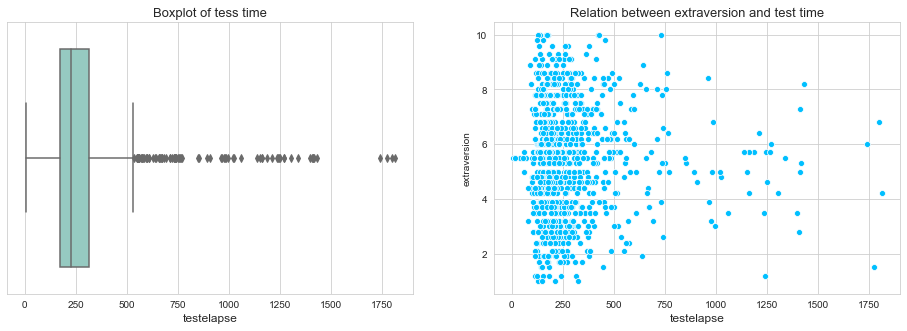

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1 = sns.boxplot(sample['testelapse'], palette = 'Set3', ax = ax1)
ax1.set_title('Boxplot of tess time', fontsize = 13)
ax1.set_xlabel(xlabel = 'testelapse', fontsize = 12)

ax2 = sns.scatterplot(y = 'extraversion', x = 'testelapse', data = sample, color = 'deepskyblue', ax = ax2)
ax2.set_title('Relation between extraversion and test time', fontsize = 13)
ax2.set_xlabel(xlabel = 'testelapse', fontsize = 12)

plt.show()

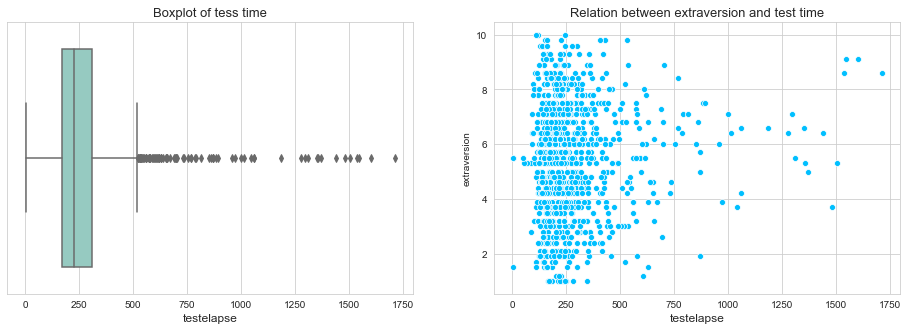

In [63]:
sample = tdf.loc[tdf['IPC'] == 1].loc[tdf['testelapse'] < 2000].sample(n = 1000) # 2000 seconds is realistic time for this test
                                                                     # IPC is The number of records from the user's IP address 

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1 = sns.boxplot(sample['testelapse'], palette = 'Set3', ax = ax1)
ax1.set_title('Boxplot of tess time', fontsize = 13)
ax1.set_xlabel(xlabel = 'testelapse', fontsize = 12)

ax2 = sns.scatterplot(y = 'extraversion', x = 'testelapse', data = sample, color = 'deepskyblue', ax = ax2)
ax2.set_title('Relation between extraversion and test time', fontsize = 13)
ax2.set_xlabel(xlabel = 'testelapse', fontsize = 12)


plt.show()

#### I guessed, that using entire population may cause some mistakes, so I decided to try sample test to confirm previous results.<br>  And the test shows that there is no relationship between Extraversion and test time.

In [64]:
# Relation between all traits and test time

In [65]:
traits = list(five_traits.keys()) # Extracting five traits

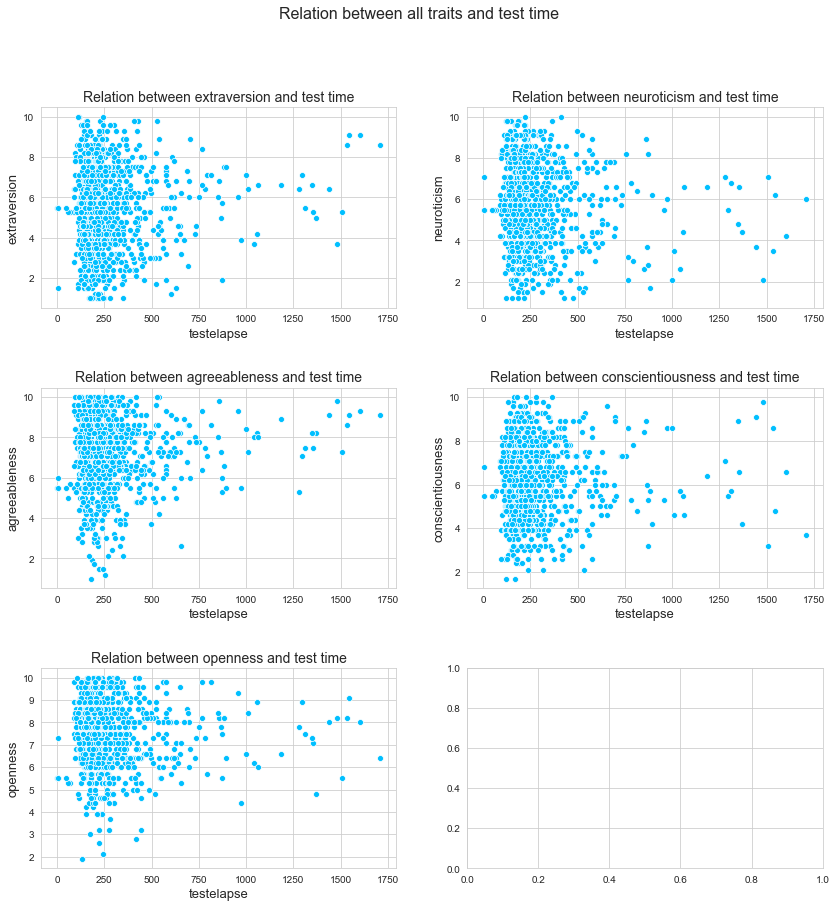

In [66]:
fig, axis = plt.subplots(3,2, figsize = (14,14))  
fig.suptitle('Relation between all traits and test time', fontsize = 16)
plt.subplots_adjust(hspace = 0.4)

axis = axis.ravel()
count = range(5)

for i in count:
    axis[i] = sns.scatterplot(y = traits[i], x = 'testelapse', data = sample, color = 'deepskyblue', ax = axis[i])
    axis[i].set_title('Relation between {} and test time'.format(traits[i]), fontsize = 14)
    axis[i].set_xlabel(xlabel = 'testelapse', fontsize = 13)
    axis[i].set_ylabel(ylabel = traits[i], fontsize = 13)

In [67]:
print('\033[1m' + 'To finally confirm previous results I have built correlation matrix and extracted testelapse results.' + 
     '\033[0m')
print('\033[1m' + 'Correlation matrix:' + '\033[0m')
tdf.corr()['testelapse'].to_frame().iloc[:5,:]

To finally confirm previous results I have built correlation matrix and extracted testelapse results.
Correlation matrix:


,testelapse
extraversion,0.004518
neuroticism,-0.002907
agreeableness,0.002213
conscientiousness,-0.000636
openness,-0.001512


### Final results:
#### There is no correlations between personality traits and test time.